In [2]:
from sklearn.datasets import load_boston,load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [3]:
from pandasxtend.eda.stats import KL_Divergence,Summary
from pandasxtend.eda.visualization import AllPlot

from pandasxtend.catdap import CATDAP01,CATDAP02

In [4]:
#load_breast_cancer()

In [5]:
X = load_boston()["data"]
y = load_boston()["target"]
cols = load_boston()["feature_names"]

X_df = pd.DataFrame(X)
X_df.columns = cols

In [6]:
np.random.seed(1111)
X_df["rand"] = np.random.choice([1,2,3,4,5],X_df.shape[0])

In [7]:
dic_date = {1:"19900101",2:"20000202",3:"20100303",4:"20200404",5:np.nan}
dic_str = {1:"A",2:"BB",3:"CCC",4:"DDDD",5:"EEEEE"}

X_df["sample_datetime"] = pd.to_datetime(X_df["rand"].map(dic_date))
X_df["sample_str"] = X_df["rand"].map(dic_str)

In [8]:
X_df["flg_over_age"] = (X_df["AGE"] >= X_df["AGE"].mean()).astype(int)

In [7]:
bun_df = X_df.copy()
bun_df["target"] = y

In [8]:
mean_target = bun_df["target"].mean()
bun_df["flg_target"] = (bun_df["target"] >= mean_target).astype(int)
#bun_df["flg_target"] = (bun_df["target"] < mean_target)

In [9]:
bun_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,rand,sample_datetime,sample_str,flg_over_age,target,flg_target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,5,NaT,EEEEE,0,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,2,2000-02-02,BB,1,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,5,NaT,EEEEE,0,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,3,2010-03-03,CCC,0,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,5,NaT,EEEEE,0,36.2,1


In [10]:
summary1 = Summary(bun_df)
summary1.run()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.6s finished


,column_name,format,count,unique_count,missing_count,min,p01,p05,p25,p50,p75,p95,p99,max,mean,std,mode_value,mode_counts,head1,tail1
0,CRIM,numeric,506,504,0,0.00632,0.01361,0.02791,0.082045,0.25651,3.677083,15.78915,41.37033,88.9762,3.613524,8.601545,0.01501,2,0.00632,0.04741
1,ZN,numeric,506,26,0,0.0,0.0,0.0,0.0,0.0,12.5,80.0,90.0,100.0,11.363636,23.322453,0.0,372,18.0,0.0
2,INDUS,numeric,506,76,0,0.46,1.2535,2.18,5.19,9.69,18.1,21.89,25.65,27.74,11.136779,6.860353,18.1,132,2.31,11.93
3,CHAS,numeric,506,2,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.06917,0.253994,0.0,471,0.0,0.0
4,NOX,numeric,506,81,0,0.385,0.398,0.40925,0.449,0.538,0.624,0.74,0.871,0.871,0.554695,0.115878,0.538,23,0.538,0.573
5,RM,numeric,506,446,0,3.561,4.52445,5.314,5.8855,6.2085,6.6235,7.5875,8.335,8.78,6.284634,0.702617,6.167,3,6.575,6.03
6,AGE,numeric,506,356,0,2.9,6.61,17.725,45.025,77.5,94.075,100.0,100.0,100.0,68.574901,28.148861,100.0,43,65.2,80.8
7,DIS,numeric,506,412,0,1.1296,1.20654,1.461975,2.100175,3.20745,5.188425,7.8278,9.22277,12.1265,3.795043,2.10571,3.4952,5,4.09,2.505
8,RAD,numeric,506,9,0,1.0,1.0,2.0,4.0,5.0,24.0,24.0,24.0,24.0,9.549407,8.707259,24.0,132,1.0,1.0
9,TAX,numeric,506,66,0,187.0,188.0,222.0,279.0,330.0,666.0,666.0,666.0,711.0,408.237154,168.537116,666.0,132,296.0,273.0


In [12]:
summary1.to_csv()

In [13]:
#KL_divergence()

In [34]:
KL1 = KL_Divergence(bun_df,"flg_target",base_label=1,bins_ = 10)
KL1.run()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished


,columns,base,KL_Divergence
0,CRIM,1,0.17336
1,ZN,1,2.28355
2,INDUS,1,0.61216
3,CHAS,1,NaN
4,NOX,1,NaN
5,RM,1,NaN
6,AGE,1,1.63844
7,DIS,1,0.28534
8,RAD,1,0.06020
9,TAX,1,0.37910


In [35]:
kl_tbl = KL1.tbl_df

<AxesSubplot:>

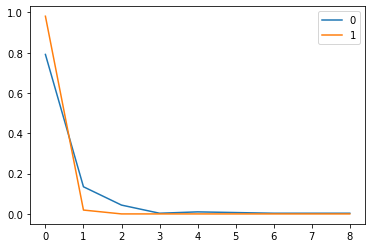

In [36]:
kl_tbl[kl_tbl["columns"] == "CRIM"][[0,1]].plot(kind = "line")

<AxesSubplot:>

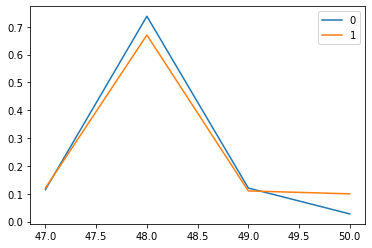

In [37]:
kl_tbl[kl_tbl["columns"] == "RAD"][[0,1]].plot(kind = "line")

<AxesSubplot:>

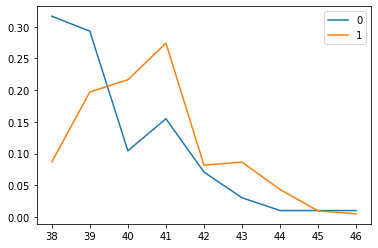

In [38]:
kl_tbl[kl_tbl["columns"] == "DIS"][[0,1]].plot(kind = "line")

<AxesSubplot:>

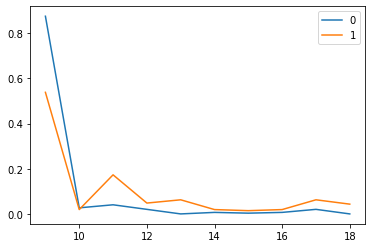

In [39]:
kl_tbl[kl_tbl["columns"] == "ZN"][[0,1]].plot(kind = "line")

<AxesSubplot:>

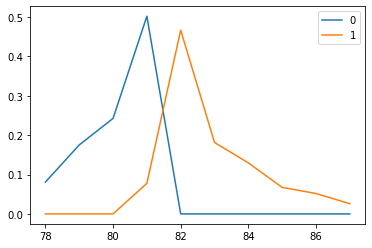

In [40]:
kl_tbl[kl_tbl["columns"] == "target"][[0,1]].plot(kind = "line")

<AxesSubplot:>

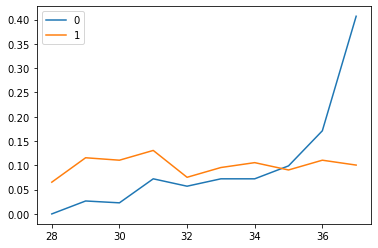

In [41]:
kl_tbl[kl_tbl["columns"] == "AGE"][[0,1]].plot(kind = "line")

In [42]:
aplt = AllPlot(bun_df)
#aplt = all_plot(bun_df)

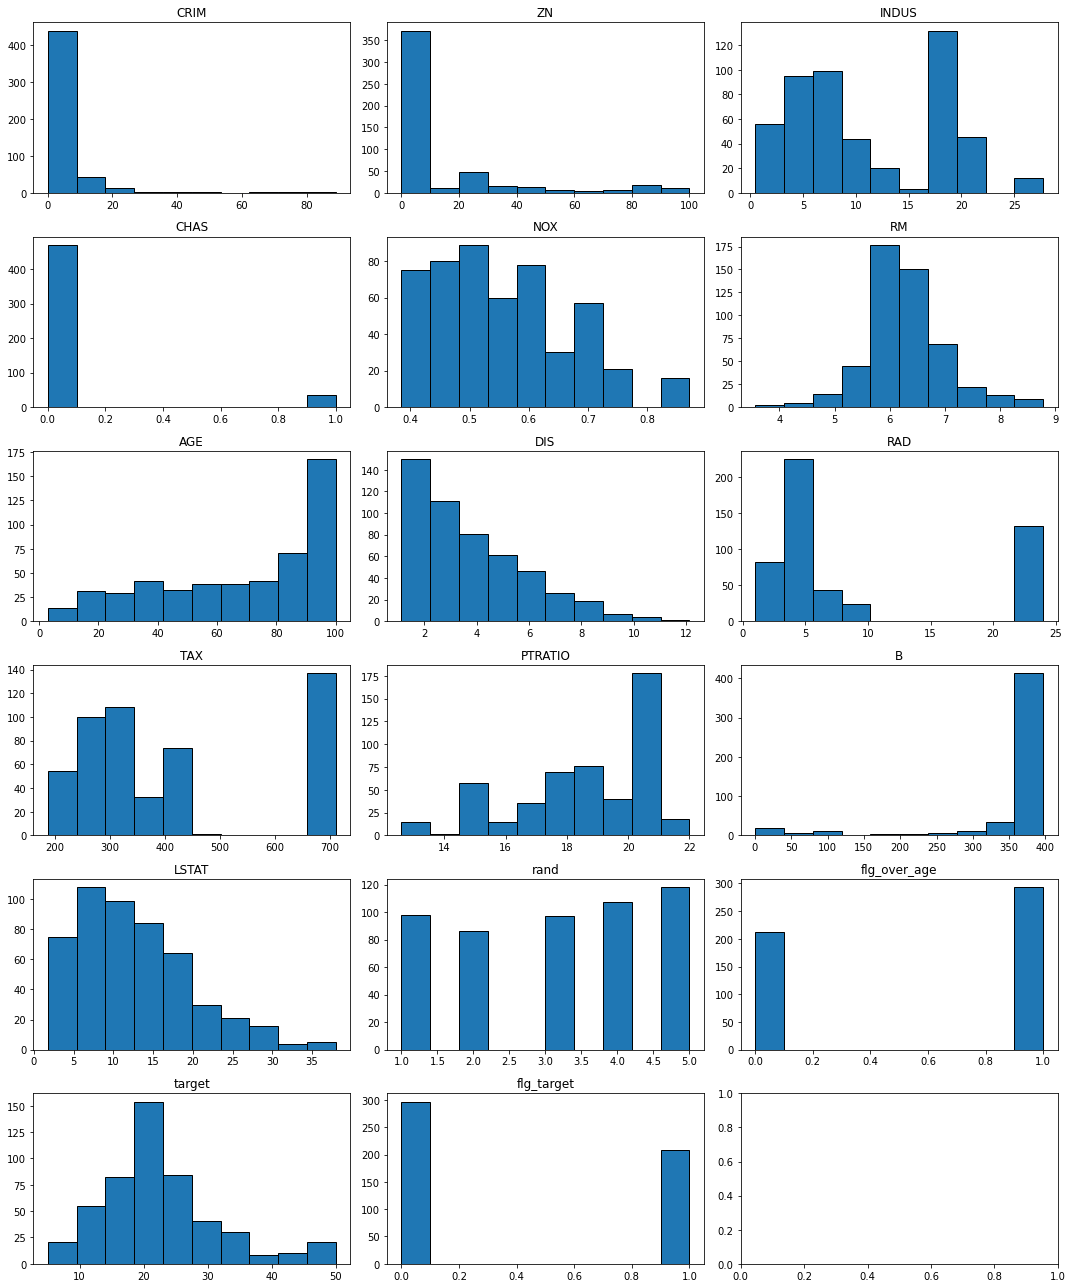

In [44]:
aplt.Histgram()

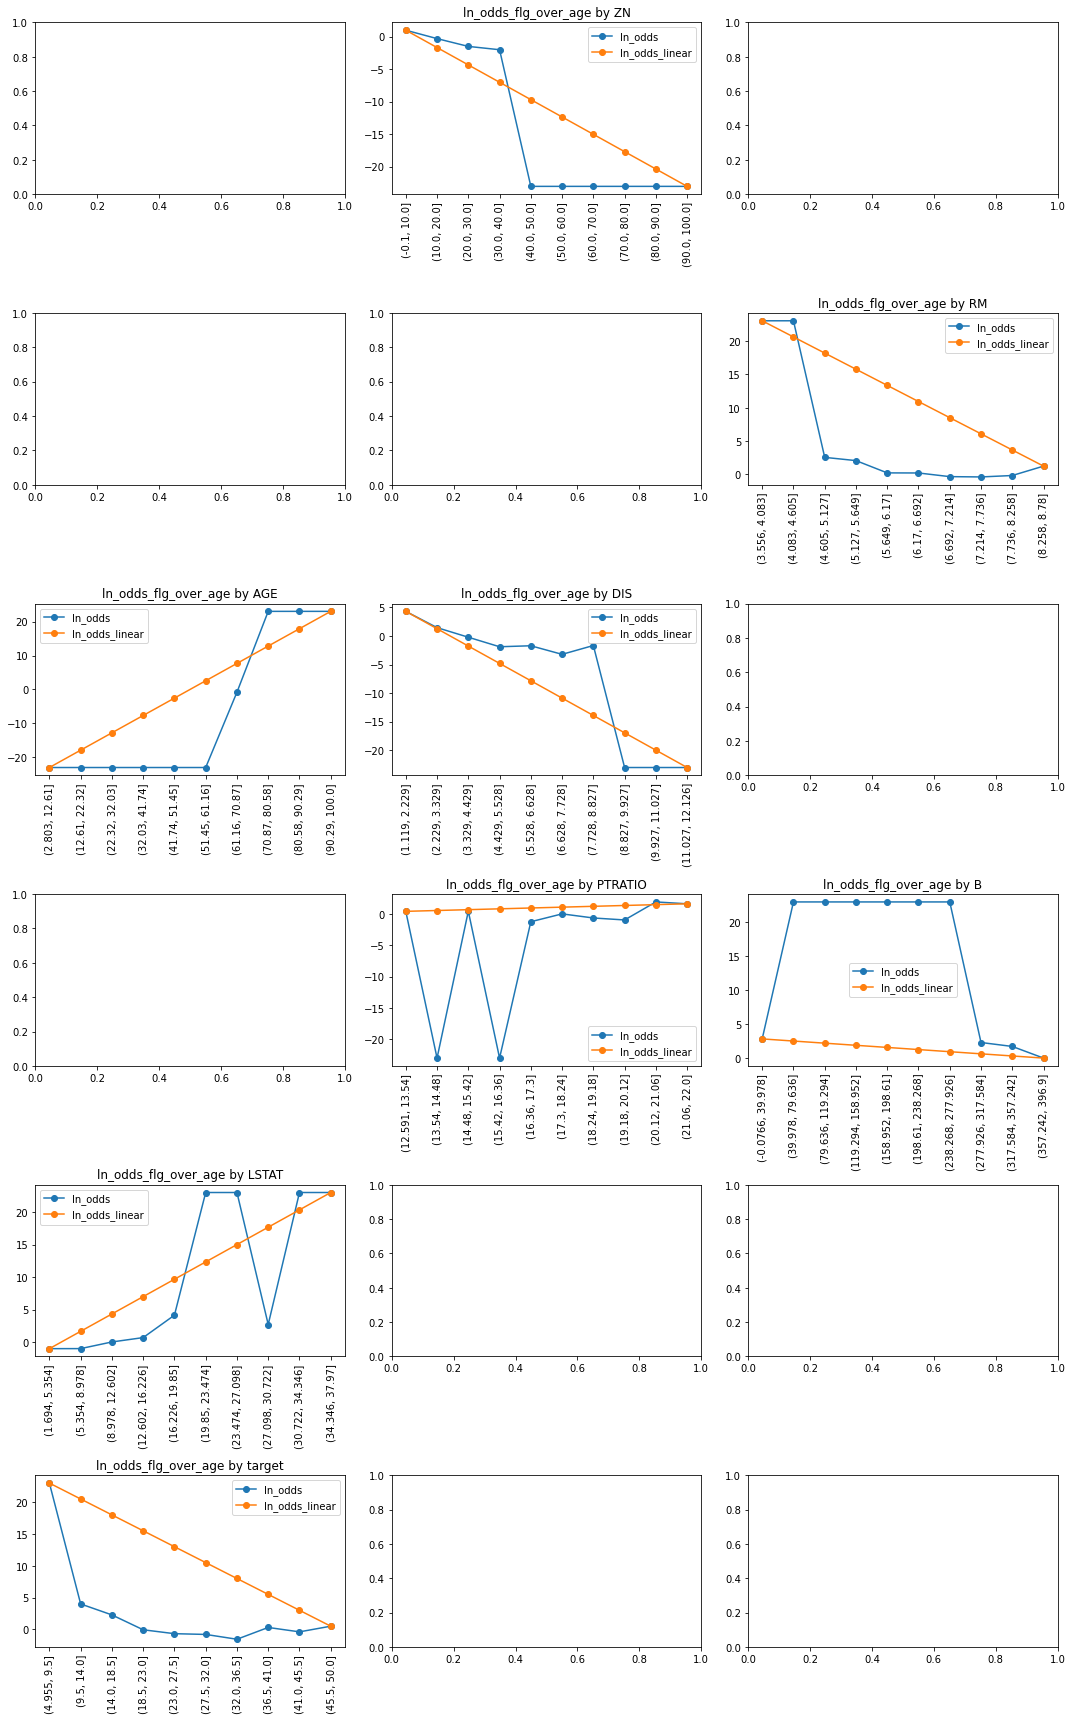

In [45]:
aplt.LinearityCheckBinaryTarget(target_="flg_over_age")

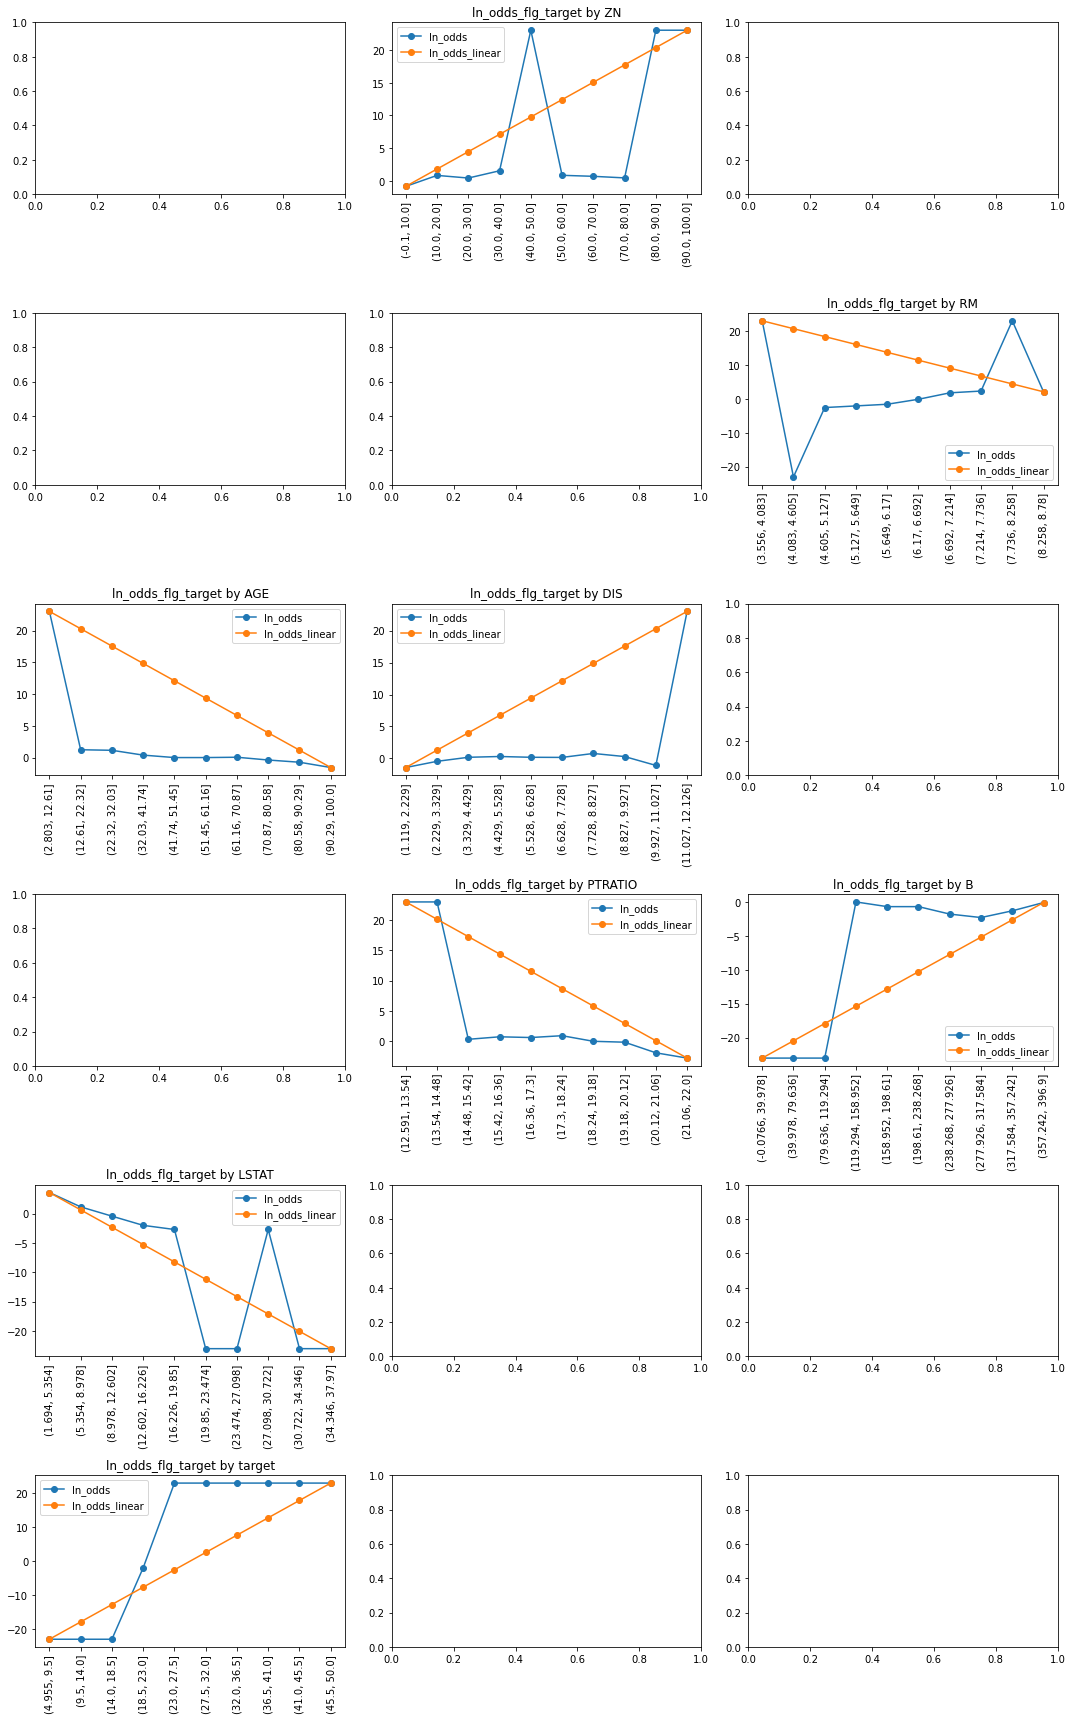

In [46]:
aplt.LinearityCheckBinaryTarget(target_="flg_target")

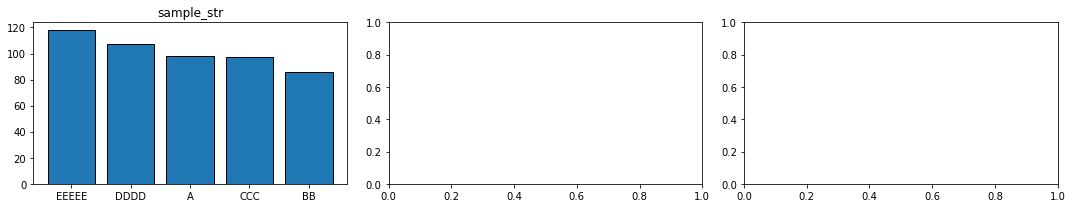

In [47]:
aplt.CountByCategory()

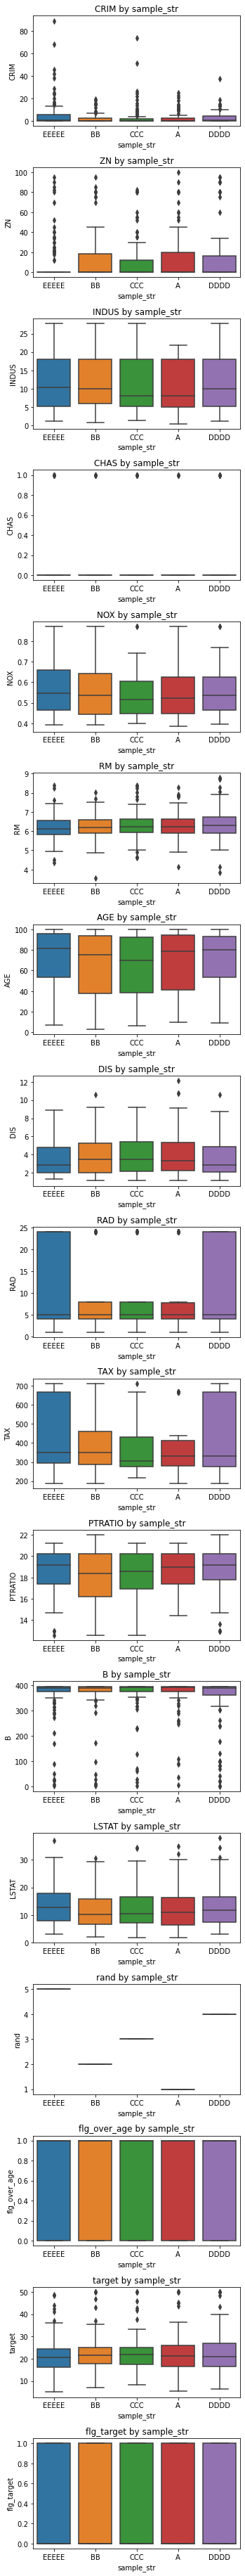

In [48]:
aplt.Boxplot()

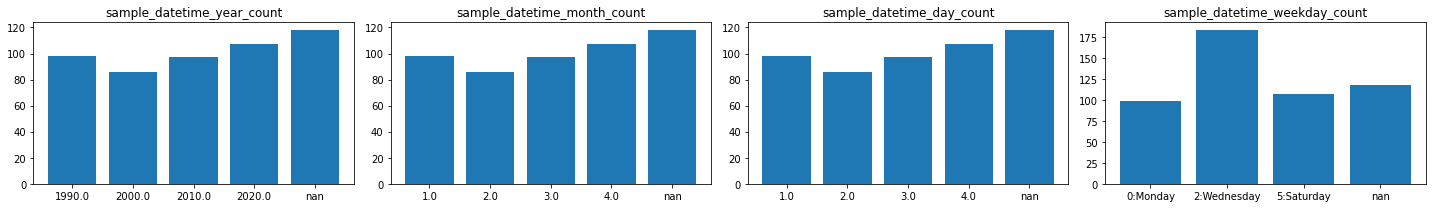

In [49]:
aplt.CountByDatetime()

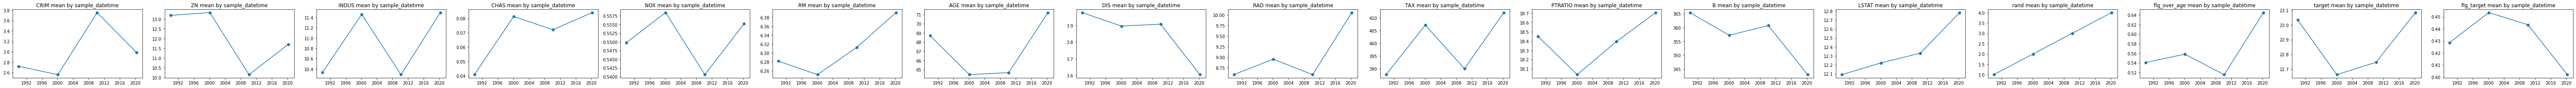

In [50]:
aplt.MeanByTimeseries()

In [17]:
y_binary = (y > y.mean()).astype(int)

In [19]:
X = X_df.copy()
y = y_binary.copy()

In [247]:
#outputobjectの作成

#feature = feature_list[0]
y_bins = 5
#X_bins = int(round(1 + np.log2(len(y)),0))
X_bins = 5
#category_count_thresholds = 50
bin_closed = "left"
adj_parametor = 1e-8

In [59]:
#X_bins

In [562]:
#対象データの作成
#目的変数がカテゴリの場合はそのまま使用
class CATDAP01:
    def __init__(self,y_type = "class",X_bins = 5,y_bins = 5,X_bin_closed = "left",adj_parametor = 1e-08):
        self.y_type = y_type
        self.X_bins = X_bins
        self.y_bins = y_bins
        self.X_bin_closed = X_bin_closed
        self.adj_parametor = adj_parametor

    def fit(self,X,y):
        feature_list = X.columns
        y_type = self.y_type
        X_bins = self.X_bins
        X_bin_closed = self.X_bin_closed
        y_bins = self.y_bins
        adj_parametor = self.adj_parametor
    
        def calc_aic_feat(feature):
            def make_DF(feature):
                if y_type == "class":
                    DF = pd.DataFrame(data = {"feature":X[feature],"label":y})

                #目的変数が数値の場合はの場合はそのまま使用
                elif y_type == "numeric":
                    if y_bins == None:
                        print("If y_type is class ,set integer into y_bins")
                    else :
                        #数値の分割
                        y_num = pd.qcut(y,y_bins,duplicates = "drop")
                        #数値の大小でソートして、ラベルを大小順にわかるようにふよ
                        y_cut = list(y_num.unique().sort_values().astype(str))

                        for i in range(0,len(y_cut)):
                            #とりあえず99分割までは対応させる。
                            i0 = str(i).zfill(2)
                            y_num = y_num.astype(str)
                            y_num.replace({labels_cut[i] : i0 + "_" + y_cut[i]},inplace = True)

                        DF = pd.DataFrame(data = {"feature":X[feature],"label":y_num})
                        DF["label"] = DF["label"].astype(str)

                return DF

            def preprocess(DF):
                #欠損データ、非欠損データに分割
                DF_miss = DF[pd.isna(DF["feature"]) == True].copy()
                DF_nmiss = DF[pd.isna(DF["feature"]) == False].copy()

                #変数が時間の場合、数値に修正する
                if str(DF_nmiss["feature"].dtype).find("[ns]") > -1:
                    DF_nmiss["feature"] = DF_nmiss["feature"].dt.year * 10000 + DF_nmiss["feature"].dt.month * 100 + DF_nmiss["feature"].dt.day

                #カテゴリ変数はそのままカテゴリとして採用
                if DF_nmiss["feature"].dtype == "object":
                    DF_nmiss["category"] = DF_nmiss["feature"]
                    cat_list = list(DF_nmiss["category"].unique())
                    cat_list.sort()

                    cardinality_ = len(cat_list)
                    cat_dict = dict(zip(
                        [cat_list[i] for i in range(cardinality_)], 
                        [str(i+1).zfill(len(str(cardinality_))) + ": " + str(cat_list[i]) for i in range(cardinality_)])
                    )
                    DF_nmiss["category"].replace(cat_dict,inplace = True)

                else :
                    try :
                        qcut_ = int(100 / X_bins)
                        p_list = [p for p in range(0,100,qcut_)]
                        p_list.extend([100])

                        q_list = [np.percentile(DF_nmiss["feature"],q) for q in p_list]

                        if X_bin_closed == "left":
                            q_list[-1] = q_list[-1] + 1
                            DF_nmiss["category"] = pd.cut(DF_nmiss["feature"],bins = q_list,right = False)
                        elif X_bin_closed == "right":
                            q_list[0] = q_list[0] - 1
                            DF_nmiss["category"] = pd.cut(DF_nmiss["feature"],bins = q_list,right = True)

                    #基本50分割でセット。それで分割できなければ生の値でいい
                    except :
                        DF_nmiss["category"] = DF_nmiss["feature"]

                    cat_list = list(DF_nmiss["category"].unique())
                    cat_list.sort()

                    cardinality_ = len(cat_list)
                    #ラベルふり
                    cat_dict = dict(zip(
                        [cat_list[i] for i in range(cardinality_)], 
                        [str(i+1).zfill(len(str(cardinality_))) + ": " + str(cat_list[i]) for i in range(cardinality_)])
                    )
                    #cat_transform_list = dict(zip(cat_list,q_list))

                    DF_nmiss["category"].replace(cat_dict,inplace = True)

                #欠損先はカテゴリを欠損で埋める
                DF_miss["category"] = str(0).zfill(len(str(cardinality_))) + ": missing"

                #欠損先と入力先を縦積み
                DF2 = pd.concat([DF_nmiss,DF_miss],axis = 0)

                missing_rate = len(DF_miss)/(len(DF_nmiss) + len(DF_miss))
                return DF2,missing_rate


            def make_cross_table(DF2):

                #AICを計算するためのクロス表を作成
                _cross = pd.crosstab(DF2["category"],DF2["label"],margins=None,dropna = False)
                #該当先がいない場合、NAになるので0埋め
                _cross = _cross.fillna(0)

                n_feature , n_label = _cross.shape
                #全体件数での対数尤度。log内が0だと計算できないので閾値を足してやる

                return _cross,n_feature,n_label

            def calc_term2(cross_table):
                term2 = (cross_table.sum().sum()) * np.log(cross_table.sum().sum() + adj_parametor)
                return term2

            def calc_term1_0(cross_table,n_feature,n_label):
                #AIC0 =====================================================================================
                #列単位での和
                i_list = [(cross_table.iloc[i,:].sum()) * np.log(cross_table.iloc[i,:].sum() + adj_parametor) for i in range(0,n_feature)]

                #行単位での和
                j_list = [(cross_table.iloc[:,j].sum()) * np.log(cross_table.iloc[:,j].sum() + adj_parametor) for j in range(0,n_label)]

                term1_0 = sum(i_list) + sum(j_list)
                return term1_0


            def calc_term1_1(cross_table,n_feature,n_label):
                #AIC1 =====================================================================================
                yudo_matrix = np.zeros([n_feature ,n_label])

                for i in range(0,n_feature):
                    for j in range(0,n_label):
                        yudo_matrix[i,j] = (cross_table.iloc[i,j]) * np.log(cross_table.iloc[i,j] + adj_parametor)

                term1_1 = yudo_matrix.sum()

                return term1_1

            def calc_aic0(term1_0,term2,n_feature,n_label):
                AIC0 = -2 * (term1_0 - 2 * term2) + 2 * (n_feature + n_label - 2)
                return AIC0

            def calc_aic1(term1_1,term2,n_feature,n_label):
                AIC1 = -2 * (term1_1 - term2) + 2 * (n_feature * n_label - 1)
                return AIC1

            def calc_aic_cat(AIC1,AIC0):
                #CATのAIC ==================================================================================
                AIC_CAT = AIC1 - AIC0
                return AIC_CAT

            def make_output_cross_table(DF2):
                output_cross_table = pd.crosstab(DF2["category"],DF2["label"],margins=True,dropna = False)
                return output_cross_table

            def make_aic_table(output_cross_table,feature,missing_rate,AIC_CAT):
                #各クラスの構成比を計算
                cardinality_label = len(output_cross_table.columns) - 1

                ratio_label = [col for col in output_cross_table.columns if col != "All"]
                ratio_table = pd.concat([round(output_cross_table.loc[:,label_]/output_cross_table.loc[:,"All"],5) for label_ in ratio_label],axis = 1)
                ratio_table.columns = ["Ratio_" + str(label_) for label_ in ratio_label]

                output_cross_table2 = output_cross_table.join(ratio_table)

                base = pd.DataFrame(index = [i for i in range(output_cross_table2.shape[0])])
                base["feature_name"] = feature
                base["missing_rate"] = missing_rate
                base["AIC"] = AIC_CAT

                AIC_table = pd.concat([base,output_cross_table2.reset_index()],axis = 1)

                return AIC_table

            DF = make_DF(feature)
            #print("make df end")
            DF2,missing_rate = preprocess(DF)
            #print("preprocess end")
            cross_table,n_feature,n_label = make_cross_table(DF2)

            term2 = calc_term2(cross_table)
            term1_0 = calc_term1_0(cross_table,n_feature,n_label)
            term1_1 = calc_term1_1(cross_table,n_feature,n_label)

            AIC0 = calc_aic0(term1_0,term2,n_feature,n_label)
            AIC1 = calc_aic1(term1_1,term2,n_feature,n_label)
            #print(AIC0,term1_0,term2)
            #print(AIC1,term1_1,term2)
            AIC_CAT = calc_aic_cat(AIC1,AIC0)
            print("AIC caluculation end")

            output_cross_table = make_output_cross_table(DF2)
            AIC_table = make_aic_table(output_cross_table,feature,missing_rate,AIC_CAT)

            return AIC_table

        aic_chunk = joblib.Parallel(n_jobs = -1)(joblib.delayed(calc_aic_feat)(feat) for feat in feature_list)
        AIC_table = pd.concat(aic_chunk,axis = 0)
        AIC_table.sort_values(["AIC","feature_name","category"],ascending = [True,True,True],inplace = True)
        AIC_table.reset_index(drop = True,inplace = True)
        AIC_summary = AIC_table[["feature_name","AIC"]].drop_duplicates()

        self.AIC_table = AIC_table
        self.AIC_summary = AIC_summary
        print("AIC calculation is end")

    def to_csv(self,output_dir = "./",file_name = "temp"):
        AIC_table = self.AIC_table
        AIC_summary = self.AIC_summary 
        AIC_table.to_csv(output_dir +"AIC_table_{}.csv".format(file_name))
        AIC_summary.to_csv(output_dir +"AIC_summary_{}.csv".format(file_name))
        

In [563]:
cat = CATDAP01()
cat.fit(X,y_binary)

AIC calculation is end


In [564]:
cat.to_csv()

In [560]:
cat.AIC_table

,feature_name,missing_rate,AIC,category,0,1,All,Ratio_0,Ratio_1
0,LSTAT,0.0,-293.241385,"1: [1.73, 6.29)",5,96,101,0.04950,0.95050
1,LSTAT,0.0,-293.241385,"2: [6.29, 9.53)",32,69,101,0.31683,0.68317
2,LSTAT,0.0,-293.241385,"3: [9.53, 13.33)",70,31,101,0.69307,0.30693
3,LSTAT,0.0,-293.241385,"4: [13.33, 18.06)",91,9,100,0.91000,0.09000
4,LSTAT,0.0,-293.241385,"5: [18.06, 38.97)",99,4,103,0.96117,0.03883
...,...,...,...,...,...,...,...,...,...
116,sample_str,0.0,5.294963,2: BB,47,39,86,0.54651,0.45349
117,sample_str,0.0,5.294963,3: CCC,54,43,97,0.55670,0.44330
118,sample_str,0.0,5.294963,4: DDDD,64,43,107,0.59813,0.40187
119,sample_str,0.0,5.294963,5: EEEEE,76,42,118,0.64407,0.35593


In [559]:
cat.AIC_summary

,feature_name,AIC
0,LSTAT,-293.241385
6,RM,-194.994233
12,INDUS,-148.460786
18,PTRATIO,-134.295593
24,NOX,-115.216679
30,AGE,-92.567535
36,TAX,-84.910454
42,CRIM,-80.392822
48,RAD,-76.763353
58,flg_over_age,-73.076709


In [556]:
cat.AIC_output

,feature_name,missing_rate,AIC,category,0,1,All,Ratio_0,Ratio_1
0,LSTAT,0.0,-293.241385,"1: [1.73, 6.29)",5,96,101,0.04950,0.95050
1,LSTAT,0.0,-293.241385,"2: [6.29, 9.53)",32,69,101,0.31683,0.68317
2,LSTAT,0.0,-293.241385,"3: [9.53, 13.33)",70,31,101,0.69307,0.30693
3,LSTAT,0.0,-293.241385,"4: [13.33, 18.06)",91,9,100,0.91000,0.09000
4,LSTAT,0.0,-293.241385,"5: [18.06, 38.97)",99,4,103,0.96117,0.03883
...,...,...,...,...,...,...,...,...,...
116,sample_str,0.0,5.294963,2: BB,47,39,86,0.54651,0.45349
117,sample_str,0.0,5.294963,3: CCC,54,43,97,0.55670,0.44330
118,sample_str,0.0,5.294963,4: DDDD,64,43,107,0.59813,0.40187
119,sample_str,0.0,5.294963,5: EEEEE,76,42,118,0.64407,0.35593


(17, 2)

In [547]:
X.shape

(506, 17)

In [ ]:
cat.fit()

In [509]:
calc_aic_feat("sample_str")

AIC caluculation end


,feature_name,missing_rate,AIC,category,0,1,All,Ratio_0,Ratio_1
0,sample_str,0.0,5.294963,1: A,56,42,98,0.57143,0.42857
1,sample_str,0.0,5.294963,2: BB,47,39,86,0.54651,0.45349
2,sample_str,0.0,5.294963,3: CCC,54,43,97,0.55670,0.44330
3,sample_str,0.0,5.294963,4: DDDD,64,43,107,0.59813,0.40187
4,sample_str,0.0,5.294963,5: EEEEE,76,42,118,0.64407,0.35593
5,sample_str,0.0,5.294963,All,297,209,506,0.58696,0.41304


In [516]:
AIC_output

,feature_name,missing_rate,AIC,category,0,1,All,Ratio_0,Ratio_1
0,LSTAT,0.0,-293.241385,"1: [1.73, 6.29)",5,96,101,0.04950,0.95050
1,LSTAT,0.0,-293.241385,"2: [6.29, 9.53)",32,69,101,0.31683,0.68317
2,LSTAT,0.0,-293.241385,"3: [9.53, 13.33)",70,31,101,0.69307,0.30693
3,LSTAT,0.0,-293.241385,"4: [13.33, 18.06)",91,9,100,0.91000,0.09000
4,LSTAT,0.0,-293.241385,"5: [18.06, 38.97)",99,4,103,0.96117,0.03883
...,...,...,...,...,...,...,...,...,...
116,sample_str,0.0,5.294963,2: BB,47,39,86,0.54651,0.45349
117,sample_str,0.0,5.294963,3: CCC,54,43,97,0.55670,0.44330
118,sample_str,0.0,5.294963,4: DDDD,64,43,107,0.59813,0.40187
119,sample_str,0.0,5.294963,5: EEEEE,76,42,118,0.64407,0.35593


In [491]:
#AIC_output["AIC"].unique()

6

In [139]:
    #各クラスの構成比を計算
    loop = len(_cross2.columns) - 1
    for i in range(0,loop):
        _cross2["Ratio_" + str(_cross2.columns[i])] = _cross2.iloc[:,i]/_cross2["All"]

    #計算したAICをリストに保存
    _OUT = [feature,AIC_CAT,input_rate]
    AIC_LIST.append(_OUT)
    CROSS_DICTIONARY[feature] = _cross2
# ここまでAICの計算 ****************

#資料を保存
AIC_LIST2 = pd.DataFrame(AIC_LIST)
AIC_LIST2.columns = ["Feature","AIC","Input_Ratio"]
AIC_LIST3 = AIC_LIST2.sort_values(["AIC"])

self.AIC_LIST = AIC_LIST3
self.CrossTable_dict = CROSS_DICTIONARY

In [ ]:


# AICを計算　*******************
for feature in tqdm(feature_list):
    #print(feature)

    #対象データの作成
    #目的変数がカテゴリの場合はそのまま使用
    if self.y_type == "class":
        DF = pd.DataFrame(data = {"feature":X[feature],"label":y})

    #目的変数が数値の場合はの場合はそのまま使用
    elif self.y_type == "numeric":
        if self.y_bins == None:
            print("If y_type is class ,set integer into y_bins")
            return

        else :
            #数値の分割
            y_num = pd.qcut(y,self.y_bins,duplicates = "drop")
            #数値の大小でソートして、ラベルを大小順にわかるようにふよ
            labels_cut = list(y_num.unique().sort_values().astype(str))

            for i in range(0,len(labels_cut)):
                #とりあえず99分割までは対応させる。
                i0 = str((101 + i))[1:3]
                y_num = y_num.astype(str)
                y_num.replace({labels_cut[i] : i0 + "_" +  labels_cut[i]},inplace = True)

            DF = pd.DataFrame(data = {"feature":X[feature],"label":y_num})


    DF["label"] = DF["label"].astype(str)

    #欠損データ、非欠損データに分割
    DF_miss = DF[pd.isna(DF["feature"]) == True].copy()
    DF_nmiss = DF[pd.isna(DF["feature"]) == False].copy()

    #変数が時間の場合、数値に修正する
    #if str(DF_nmiss["feature"].dtype).find("[ns]") > -1:
    #    DF_nmiss["feature"] = DF_nmiss["feature"].astype(int)
    if str(DF_nmiss["feature"].dtype).find("[ns]") > -1:
        DF_nmiss["feature"] = DF_nmiss["feature"].dt.year * 10000 + DF_nmiss["feature"].dt.month * 100 + DF_nmiss["feature"].dt.day


    #カテゴリ変数はそのままカテゴリとして採用
    if DF_nmiss["feature"].dtype == "object":
        if len(DF_nmiss["feature"].unique()) >= self.thresholds_category_count:
            DF_nmiss["category"] = "Integrated"

        else :
            DF_nmiss["category"] = DF_nmiss["feature"]


    else :
        try :
            DF_nmiss["category"] = pd.qcut(DF_nmiss["feature"],self.X_bins,duplicates = "drop")

        #基本50分割でセット。それで分割できなければ生の値でいい
        except :
            if len(DF_nmiss["feature"].unique()) >= self.thresholds_category_count:
                DF_nmiss["category"] = "Integrated"
            else :
                DF_nmiss["category"] = DF_nmiss["feature"]


        cat_list = list(DF_nmiss["category"].unique())
        cat_list.sort()

        cat_list2 = {}
        for i in range(len(cat_list)):
                #print(str(i) + ": " + str(cat_list[i]))
                i0 = str(100 + i + 1)
                cat_list2[cat_list[i]] = i0[1:3] + ": " + str(cat_list[i])

        DF_nmiss["category"].replace(cat_list2,inplace = True)

    #else :
    #    print("予想外の事態")

    #欠損先はカテゴリを欠損で埋める
    DF_miss["category"] = "00: Deficiency"

    #欠損先と入力先を縦積み
    DF2 = pd.concat([DF_nmiss,DF_miss],axis = 0)

    #AICを計算するためのクロス表を作成
    _cross = pd.crosstab(DF2["category"],DF2["label"],margins=None,dropna = False)
    #該当先がいない場合、NAになるので0埋め
    _cross = _cross.fillna(0)

    n_feature , n_label = _cross.shape
    #全体件数での対数尤度。log内が0だと計算できないので閾値を足してやる

    _term2 = (_cross.sum().sum()) * np.log(_cross.sum().sum() + self.adj)

    #AIC0 =====================================================================================
    temp = []
    #列単位での和
    for i in range(0,n_feature):
        temp.append((_cross.iloc[i,:].sum()) * np.log(_cross.iloc[i,:].sum() + self.adj) )

    #行単位での和
    for j in range(0,n_label):
        temp.append((_cross.iloc[:,j].sum()) * np.log(_cross.iloc[:,j].sum() + self.adj))

    _term1_0 = sum(temp)

    AIC0 = -2 * (_term1_0 - 2 * _term2) + 2 * (n_feature + n_label - 2)

    #AIC1 =====================================================================================
    _cross_yudo = np.zeros([n_feature ,n_label])

    for i in range(0,n_feature):
        for j in range(0,n_label):
            _cross_yudo[i,j] = (_cross.iloc[i,j]) * np.log(_cross.iloc[i,j] + self.adj)

    _term1_1 = _cross_yudo.sum()

    AIC1 = -2 * (_term1_1 - _term2) + 2 * (n_feature * n_label - 1)

    #CATのAIC ==================================================================================
    AIC_CAT = AIC1 - AIC0

    #情報の入力率
    input_rate = len(DF_nmiss)/(len(DF_nmiss) + len(DF_miss))

    #クロス表
    _cross2 = pd.crosstab(DF2["category"],DF2["label"],margins=True,dropna = False)

    #各クラスの構成比を計算
    loop = len(_cross2.columns) - 1
    for i in range(0,loop):
        _cross2["Ratio_" + str(_cross2.columns[i])] = _cross2.iloc[:,i]/_cross2["All"]

    #計算したAICをリストに保存
    _OUT = [feature,AIC_CAT,input_rate]
    AIC_LIST.append(_OUT)
    CROSS_DICTIONARY[feature] = _cross2
# ここまでAICの計算 ****************

#資料を保存
AIC_LIST2 = pd.DataFrame(AIC_LIST)
AIC_LIST2.columns = ["Feature","AIC","Input_Ratio"]
AIC_LIST3 = AIC_LIST2.sort_values(["AIC"])

self.AIC_LIST = AIC_LIST3
self.CrossTable_dict = CROSS_DICTIONARY

In [ ]:
class CATDAP01:
        
    def __init__(self,X_bins = 5,y_type = "class",y_bins = 5,thresholds_category_count = 50,adj = 1e-10):
        """
        y_type select following type ["class","numeric"]
        
        """
        self.X_bins = X_bins
        self.y_type = y_type
        self.y_bins = y_bins
        self.thresholds_category_count = thresholds_category_count
        self.adj = adj

    def fit(self,X,y):
        """
        input/X,y
        example/CATDAP().fit(X=X_train,y = train_label)
        """
        import numpy as np
        import pandas as pd
        from tqdm import tqdm

        #outputobjectの作成
        AIC_LIST = []
        CROSS_DICTIONARY = {}

        feature_list = X.columns

        # AICを計算　*******************
        for feature in tqdm(feature_list):
            #print(feature)
                        
            #対象データの作成
            #目的変数がカテゴリの場合はそのまま使用
            if self.y_type == "class":
                DF = pd.DataFrame(data = {"feature":X[feature],"label":y})

            #目的変数が数値の場合はの場合はそのまま使用
            elif self.y_type == "numeric":
                if self.y_bins == None:
                    print("If y_type is class ,set integer into y_bins")
                    return

                else :
                    #数値の分割
                    y_num = pd.qcut(y,self.y_bins,duplicates = "drop")
                    #数値の大小でソートして、ラベルを大小順にわかるようにふよ
                    labels_cut = list(y_num.unique().sort_values().astype(str))

                    for i in range(0,len(labels_cut)):
                        #とりあえず99分割までは対応させる。
                        i0 = str((101 + i))[1:3]
                        y_num = y_num.astype(str)
                        y_num.replace({labels_cut[i] : i0 + "_" +  labels_cut[i]},inplace = True)

                    DF = pd.DataFrame(data = {"feature":X[feature],"label":y_num})


            DF["label"] = DF["label"].astype(str)

            #欠損データ、非欠損データに分割
            DF_miss = DF[pd.isna(DF["feature"]) == True].copy()
            DF_nmiss = DF[pd.isna(DF["feature"]) == False].copy()

            #変数が時間の場合、数値に修正する
            #if str(DF_nmiss["feature"].dtype).find("[ns]") > -1:
            #    DF_nmiss["feature"] = DF_nmiss["feature"].astype(int)
            if str(DF_nmiss["feature"].dtype).find("[ns]") > -1:
                DF_nmiss["feature"] = DF_nmiss["feature"].dt.year * 10000 + DF_nmiss["feature"].dt.month * 100 + DF_nmiss["feature"].dt.day

            
            #カテゴリ変数はそのままカテゴリとして採用
            if DF_nmiss["feature"].dtype == "object":
                if len(DF_nmiss["feature"].unique()) >= self.thresholds_category_count:
                    DF_nmiss["category"] = "Integrated"

                else :
                    DF_nmiss["category"] = DF_nmiss["feature"]

            #数値データはビン化
            #if (DF_nmiss["feature"].dtype == "float") | (DF_nmiss["feature"].dtype == "int") :
            
            #elif str(DF_nmiss["feature"].dtype).find("[ns]") > -1:
            #    try :
            #        DF_nmiss["category"] = pd.qcut(DF_nmiss["feature"],self.X_bins,duplicates = "drop")

                #基本50分割でセット。それで分割できなければもう生の値でいい
            #    except :
            #        if len(DF_nmiss["feature"].unique()) >= self.thresholds_category_count:
            #            DF_nmiss["category"] = "Integrated"
            #        else :
            #            DF_nmiss["category"] = DF_nmiss["feature"]
            
            else :
                try :
                    DF_nmiss["category"] = pd.qcut(DF_nmiss["feature"],self.X_bins,duplicates = "drop")

                #基本50分割でセット。それで分割できなければ生の値でいい
                except :
                    if len(DF_nmiss["feature"].unique()) >= self.thresholds_category_count:
                        DF_nmiss["category"] = "Integrated"
                    else :
                        DF_nmiss["category"] = DF_nmiss["feature"]


                cat_list = list(DF_nmiss["category"].unique())
                cat_list.sort()

                cat_list2 = {}
                for i in range(len(cat_list)):
                        #print(str(i) + ": " + str(cat_list[i]))
                        i0 = str(100 + i + 1)
                        cat_list2[cat_list[i]] = i0[1:3] + ": " + str(cat_list[i])

                DF_nmiss["category"].replace(cat_list2,inplace = True)

            #else :
            #    print("予想外の事態")

            #欠損先はカテゴリを欠損で埋める
            DF_miss["category"] = "00: Deficiency"

            #欠損先と入力先を縦積み
            DF2 = pd.concat([DF_nmiss,DF_miss],axis = 0)

            #AICを計算するためのクロス表を作成
            _cross = pd.crosstab(DF2["category"],DF2["label"],margins=None,dropna = False)
            #該当先がいない場合、NAになるので0埋め
            _cross = _cross.fillna(0)

            n_feature , n_label = _cross.shape
            #全体件数での対数尤度。log内が0だと計算できないので閾値を足してやる

            _term2 = (_cross.sum().sum()) * np.log(_cross.sum().sum() + self.adj)

            #AIC0 =====================================================================================
            temp = []
            #列単位での和
            for i in range(0,n_feature):
                temp.append((_cross.iloc[i,:].sum()) * np.log(_cross.iloc[i,:].sum() + self.adj) )

            #行単位での和
            for j in range(0,n_label):
                temp.append((_cross.iloc[:,j].sum()) * np.log(_cross.iloc[:,j].sum() + self.adj))

            _term1_0 = sum(temp)

            AIC0 = -2 * (_term1_0 - 2 * _term2) + 2 * (n_feature + n_label - 2)

            #AIC1 =====================================================================================
            _cross_yudo = np.zeros([n_feature ,n_label])

            for i in range(0,n_feature):
                for j in range(0,n_label):
                    _cross_yudo[i,j] = (_cross.iloc[i,j]) * np.log(_cross.iloc[i,j] + self.adj)

            _term1_1 = _cross_yudo.sum()

            AIC1 = -2 * (_term1_1 - _term2) + 2 * (n_feature * n_label - 1)

            #CATのAIC ==================================================================================
            AIC_CAT = AIC1 - AIC0

            #情報の入力率
            input_rate = len(DF_nmiss)/(len(DF_nmiss) + len(DF_miss))

            #クロス表
            _cross2 = pd.crosstab(DF2["category"],DF2["label"],margins=True,dropna = False)

            #各クラスの構成比を計算
            loop = len(_cross2.columns) - 1
            for i in range(0,loop):
                _cross2["Ratio_" + str(_cross2.columns[i])] = _cross2.iloc[:,i]/_cross2["All"]

            #計算したAICをリストに保存
            _OUT = [feature,AIC_CAT,input_rate]
            AIC_LIST.append(_OUT)
            CROSS_DICTIONARY[feature] = _cross2
        # ここまでAICの計算 ****************

        #資料を保存
        AIC_LIST2 = pd.DataFrame(AIC_LIST)
        AIC_LIST2.columns = ["Feature","AIC","Input_Ratio"]
        AIC_LIST3 = AIC_LIST2.sort_values(["AIC"])

        self.AIC_LIST = AIC_LIST3
        self.CrossTable_dict = CROSS_DICTIONARY

    def CrossTable_toFile(self,file_name = "CrossTab_AIC",path_output = "./",format_ = "csv"):
        """
        input/file_name,path_output
        example/CATDAP().CrossTable_toExcel(file_name = "temp.xls",path_output = "../output/")
        """
        import pandas as pd
        
        base = pd.DataFrame()

        #for key in self.CrossTable_dict.keys():
        for key in self.AIC_LIST["Feature"]:
            temp = pd.DataFrame(data = self.AIC_LIST[self.AIC_LIST["Feature"] == key]["AIC"])
            temp.index.name = "category"
            temp.index = [key]
            temp = pd.concat([temp,self.CrossTable_dict[key]],sort = False)
            base = pd.concat([base,temp])

        base.fillna("",inplace = True)
        #吐き出し
        if format_ == "csv":
            base.to_csv(path_output + file_name + "." + format_)
        
        elif format_ == "xls":
            base.to_excel(path_output + file_name + "." + format_)
        

        
        